In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score

In [2]:
#data collection and analysis

#loading the diabetes dataset to a pandas dataframe
diabetes=pd.read_csv("/content/diabetes.csv")

In [ ]:
# making a copy to protect the data
diabetes1=diabetes.copy()

In [ ]:
diabetes.shape

(768, 9)

In [ ]:
# printing the first 5 rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# getting statistical measures of the data
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


There is no null values present in the dataset but in place of null values 0 is written i.e some enteries of "glucose","BloodPressure","SkinThickness","Insulin" and "BMI" which is not possible we can clearly see this using describe() as minimum values in these columns are 0

In [3]:
column=diabetes.columns
print(column)
for i in column:
  counts=diabetes[i].value_counts()
  # Check if the key '0.0' exists in the counts Series
  if 0.0 in counts:
    print(f"{i} : {counts[0.0]}")
  else:
    print(f"{i} : 0")

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [ ]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

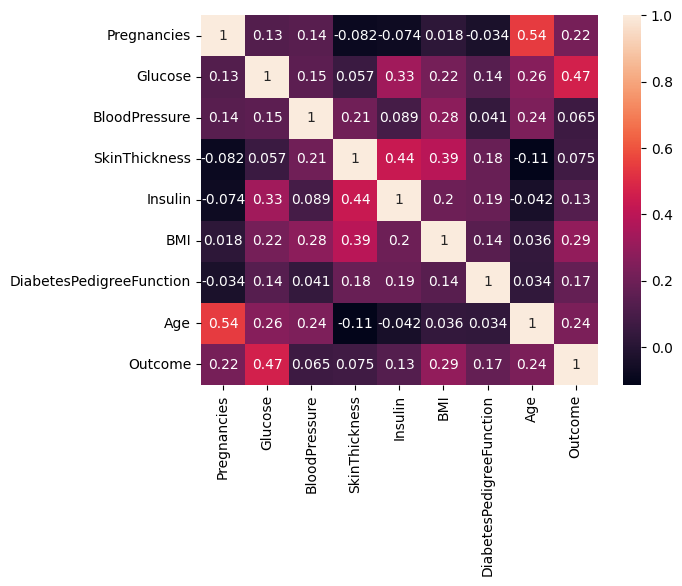

In [ ]:
sns.heatmap(diabetes.corr(),annot=True)

'Insulin' has 374 zero enteries and from feature scaling technique it is one of those columns which has least impact on data so we can drop 'Insulin' and  all of them are replaced by their medians


In [4]:
diabetes= diabetes.drop(columns=["Insulin"],axis=1)
diabetes['Glucose'] = diabetes['Glucose'].replace(0,np.nan)
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0,np.nan)
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0,np.nan)
diabetes['BMI'] = diabetes['BMI'].replace(0,np.nan)
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(np.nan,diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(np.nan,diabetes['SkinThickness'].median())
diabetes['BMI'] = diabetes['BMI'].replace(np.nan,diabetes['BMI'].median())
diabetes['Glucose'] = diabetes['Glucose'].replace(np.nan,diabetes['Glucose'].median())

diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
diabetes.shape

(768, 8)

Now the data is cleaned and
Ready to train the model using machine learning algorithms

In [ ]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>,
        <Axes: xlabel='Outcome', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>,
        <Axes: xlabel='Outcome', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

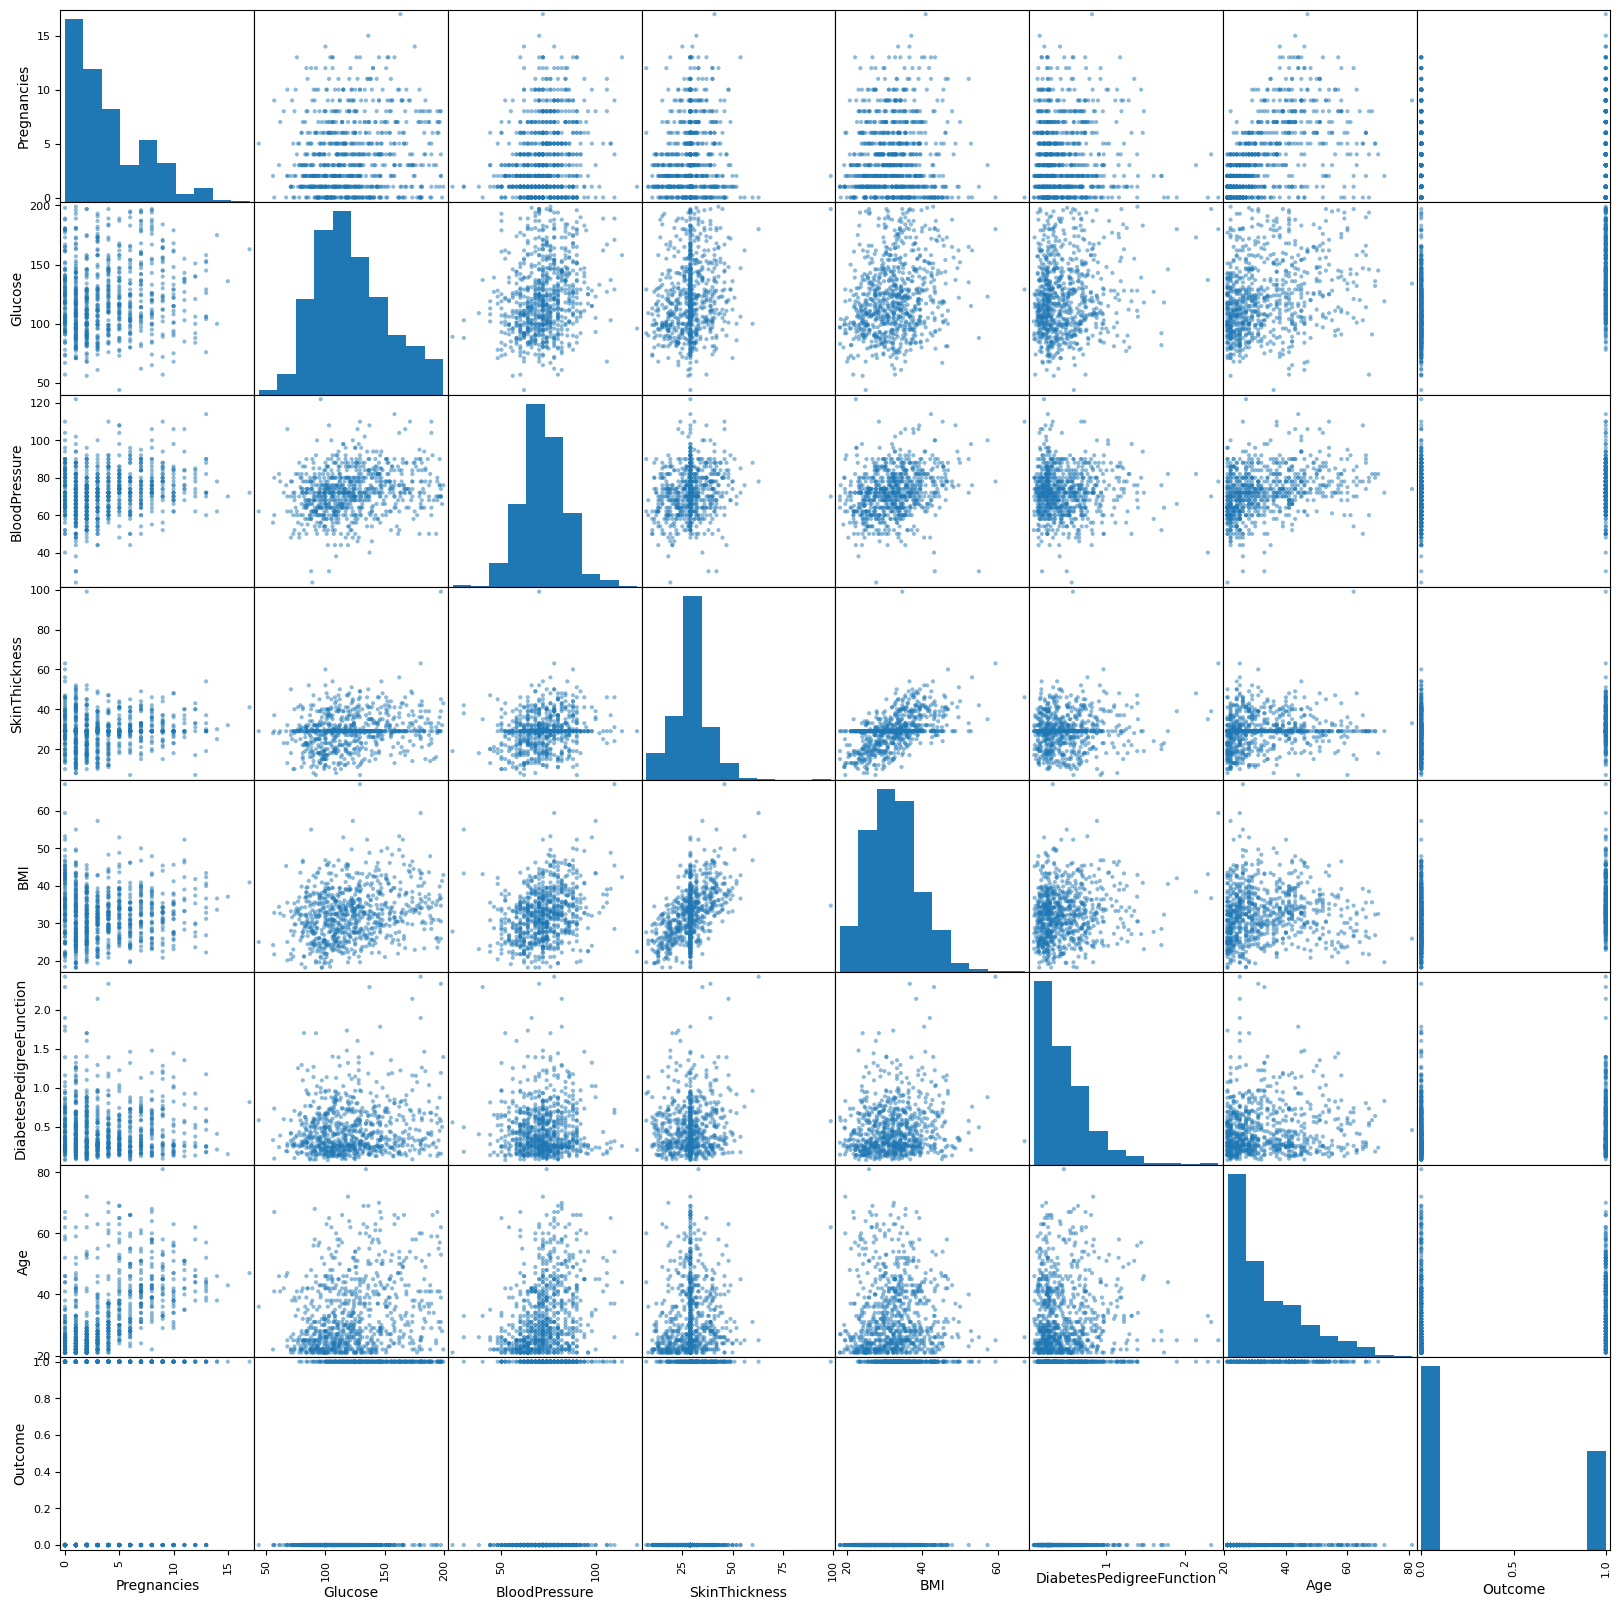

In [ ]:
scatter_matrix(diabetes,figsize=(20,20))

In [ ]:
diabetes["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
diabetes.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Now split the dataset into x and y and then scale the data since all the features have different units so we standardize the data using StandardScaler from sklearn library.

In [6]:
# seperating the data and variables
x=diabetes.drop(columns="Outcome",axis=1)
y=diabetes["Outcome"]

In [ ]:
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness   BMI  \
0              6    148.0           72.0           35.0  33.6   
1              1     85.0           66.0           29.0  26.6   
2              8    183.0           64.0           29.0  23.3   
3              1     89.0           66.0           23.0  28.1   
4              0    137.0           40.0           35.0  43.1   
..           ...      ...            ...            ...   ...   
763           10    101.0           76.0           48.0  32.9   
764            2    122.0           70.0           27.0  36.8   
765            5    121.0           72.0           23.0  26.2   
766            1    126.0           60.0           29.0  30.1   
767            1     93.0           70.0           31.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33

In [ ]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [7]:
#data standardization
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [8]:
standardize_data=scaler.transform(x)

In [9]:
print(standardize_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]


In [11]:
x=standardize_data

In [12]:
print(x)
print(y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16661938  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85219976 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33250021  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.910418   -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34279019 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29912651 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [13]:
# train test data splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
x_train.shape

(614, 7)

In [ ]:
x_test.shape

(154, 7)

Train the model

In [14]:
# Now appling SVM (Support Vector Machines) as machine learning algorithm
classifier=svm.SVC(kernel="linear")

#training the support vector machine classifier
classifier.fit(x_train,y_train)

# model evaluation
# accuracy score on the training data
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

print("accuracy score of training data using SVM:",training_data_accuracy)

# accuracy score on the test data
x_test_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print("accuracy score of test data using SVM:",test_data_accuracy)

accuracy score of training data using SVM: 0.7752442996742671
accuracy score of test data using SVM: 0.7662337662337663


In [ ]:
# now applying Naive Bayes classifier as machine learning algorithm for classification

nb = GaussianNB()
nb_model = nb.fit(x_train,y_train)
nb_pred_train=nb.predict(x_train)
nb_pred_test = nb.predict(x_test)

print("accuracy score of training data using naive bayes:",accuracy_score(nb_pred_train,y_train))
print("accuracy score of test data using naive bayes:",accuracy_score(y_test,nb_pred_test))

accuracy score of training data using naive bayes: 0.758957654723127
accuracy score of test data using naive bayes: 0.7337662337662337


In [ ]:
#now applying Random Forest classifier

rf = RandomForestClassifier()
rf_model = rf.fit(x_train,y_train)
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)

rf_score_train = accuracy_score(rf_pred_train,y_train)
rf_score_test = accuracy_score(rf_pred_test,y_test)
print("accuracy score of training data using random forest classifier:",rf_score_train)
print("accuracy score of test data using random forest classifier:",rf_score_test)

accuracy score of training data using random forest classifier: 1.0
accuracy score of test data using random forest classifier: 0.7467532467532467


In [ ]:
#fitting a logistics regression model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model = lr.fit(x_train,y_train)
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

lr_score_train = accuracy_score(lr_pred_train,y_train)
lr_score_test = accuracy_score(lr_pred_test,y_test)

print("accuracy score of training data using logistic regression:",lr_score_train)
print("accuracy score of test data using logistc regression:",lr_score_test)

accuracy score of training data using logistic regression: 0.7801302931596091
accuracy score of test data using logistc regression: 0.7272727272727273


Confusion matrix is a table which is used to describe the performance of a classification problem. It visualizes the accuracy of a classifier by comparing predicted values with actual values. The terms used in confusion matrix are
  

*   true positive (TP):predicted result is positive while it is labelled as positive.
*   true negative (TN):predicted result is negative while it is labelled as negative.
*   false positive (FP):predicted result is positive while it is labelled as negative ( Type - I error ).
*   false negative (FN): predicted result is negative while it is labelled as positive ( Type - II error ).

TN = cm [ 0, 0 ] , TP = cm [ 1,1 ] , FN = cm [ 1,0 ] , FP = cm [ 0,1 ]

<Axes: >

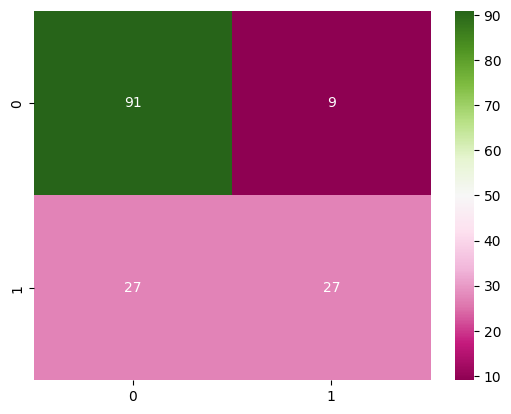

In [ ]:
# confusion matrix of SVM
cm = confusion_matrix(y_test,x_test_prediction)
cm
sns.heatmap(cm,annot=True,fmt="d",cmap="PiYG")

<Axes: >

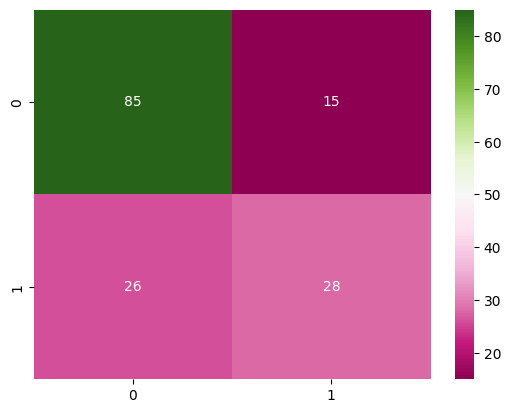

In [ ]:
# confusion matrix of Naive bayes
cm = confusion_matrix(y_test,nb_pred_test)
cm
sns.heatmap(cm,annot=True,fmt="d",cmap="PiYG")

<Axes: >

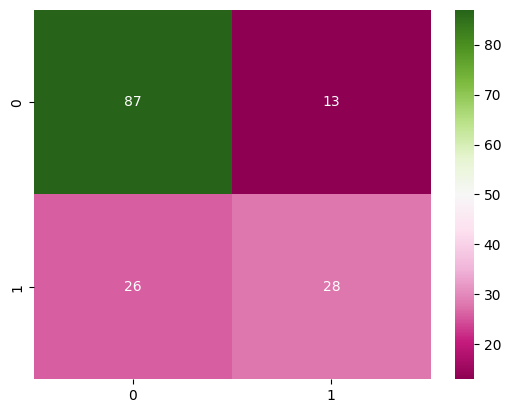

In [ ]:
# confusion matrix of Random Forest Classifier
cm_rf = confusion_matrix(y_test,rf_pred_test)
cm_rf
sns.heatmap(cm_rf,annot=True,fmt="d",cmap="PiYG")

<Axes: >

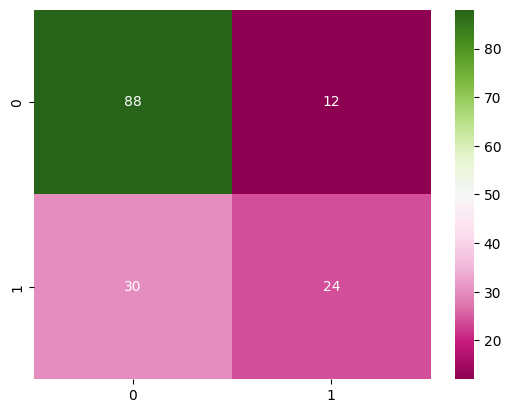

In [ ]:
# confusion matrix of logistic regression
cm_lr = confusion_matrix(y_test,lr_pred_test)
cm_lr
sns.heatmap(cm_lr,annot=True,fmt="d",cmap="PiYG")

precision is also known as positive predicted value. It is the ratio of correctly predicted (TP) observations to the total predicted positive (TP+FP) observations.


*   precision = TP / (TP+FP)

recall score is sensitivity also known as true positive rate (TPR). It is the probability that a true case will test positive


*  sensitivity = TP / (TP+FN)

specificity is the probability that a true negative will test negative. it is also known as true negative rate (TNR).

*   false positive rate (FPR) = 1-specificity




In [ ]:
print("precision score of SVM is:",precision_score(y_test,x_test_prediction))
print(classification_report(y_test,x_test_prediction))

precision score of SVM is: 0.75
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       100
           1       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [ ]:
print("precision score of Naive Bayes is:",precision_score(y_test,nb_pred_test))
print(classification_report(y_test,nb_pred_test))

precision score of Naive Bayes is: 0.6511627906976745
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       100
           1       0.65      0.52      0.58        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
print("precision score of Random Forest is:",precision_score(y_test,rf_pred_test))
print(classification_report(y_test,rf_pred_test))

precision score of Random Forest is: 0.6829268292682927
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [ ]:
print("precision score of Logistic Regression model is:",precision_score(y_test,lr_pred_test))
print(classification_report(y_test,lr_pred_test))

precision score of Logistic Regression model is: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.67      0.44      0.53        54

    accuracy                           0.73       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.72      0.73      0.71       154



 Making the predictive system

In [ ]:
input_data=(4,110,92,0,37.6,0.191,30)

# changing data as numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if prediction[0]==0:
  print("the person is not diabetic")
else:
  print("the person is diabetic")

[[ 0.04601433 -0.38319655  1.62243896 -3.31319642  0.74880175 -0.84827977
  -0.27575966]]
[0]
the person is not diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=(6,148,72,35.0,33.6,0.627,30)
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshaped)
print(std_data)

prediction=classifier.predict(std_data)
print(prediction)

if prediction[0]==0:
  print("the person is not diabetic")
else:
  print("the person is diabetic")

[[ 0.63994726  0.86604475 -0.03198993  0.67064253  0.16661938  0.46849198
  -0.27575966]]
[1]
the person is diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
